In [10]:
"""Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature"""

'Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal\nwidth feature'

In [2]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#loading the dataset
from sklearn import datasets

iris = datasets.load_iris()

In [12]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [20]:
#capture the first five in the 
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [22]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [32]:
X = iris["data"][:, 3:] #petal width
y = (iris["target"] == 2).astype(int) #creates a boolean array, true(1) for virgnica and false(0) for other

In [34]:
#training a logistric regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [38]:
#look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)



In [42]:
print(y_proba[:5])

[[9.99249051e-01 7.50949397e-04]
 [9.99239224e-01 7.60776030e-04]
 [9.99229269e-01 7.70731151e-04]
 [9.99219184e-01 7.80816439e-04]
 [9.99208966e-01 7.91033591e-04]]


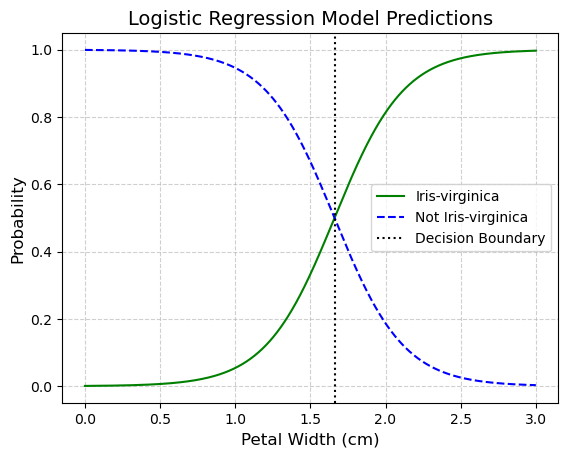

In [46]:
#ploting the probabilities
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-virginica")

# Add vertical decision boundary line at P(y=1) = 0.5
decision_boundary = X_new[np.argmax(y_proba[:, 1] >= 0.5)]  # Find where P(y=1) crosses 0.5
plt.axvline(decision_boundary, color="black", linestyle=":", linewidth=1.5, label="Decision Boundary")

# Labels and title
plt.xlabel("Petal Width (cm)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title("Logistic Regression Model Predictions", fontsize=14)
plt.legend(loc="center right", fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

In [48]:
#using a logistic prediction to predict the class
log_reg.predict([[1.7], [1.5]])

array([1, 0])